<h2>using KNN Algorith to predict if a person will have dibetes or not<h2>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [4]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [8]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/diabetes_.csv')

In [9]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
#replacing with mean of respective column

zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for col in zero_not_accepted:
  data[col] = data[col].replace(0, np.NaN)
  mean = int(data[col].mean(skipna=True))
  data[col] = data[col].replace(np.NaN, mean)

In [12]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


In [14]:
#Extracting independant variable

x = data.iloc[:,:8]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47


In [16]:
#Extracting dependant variable

y = data.iloc[:,8:9]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


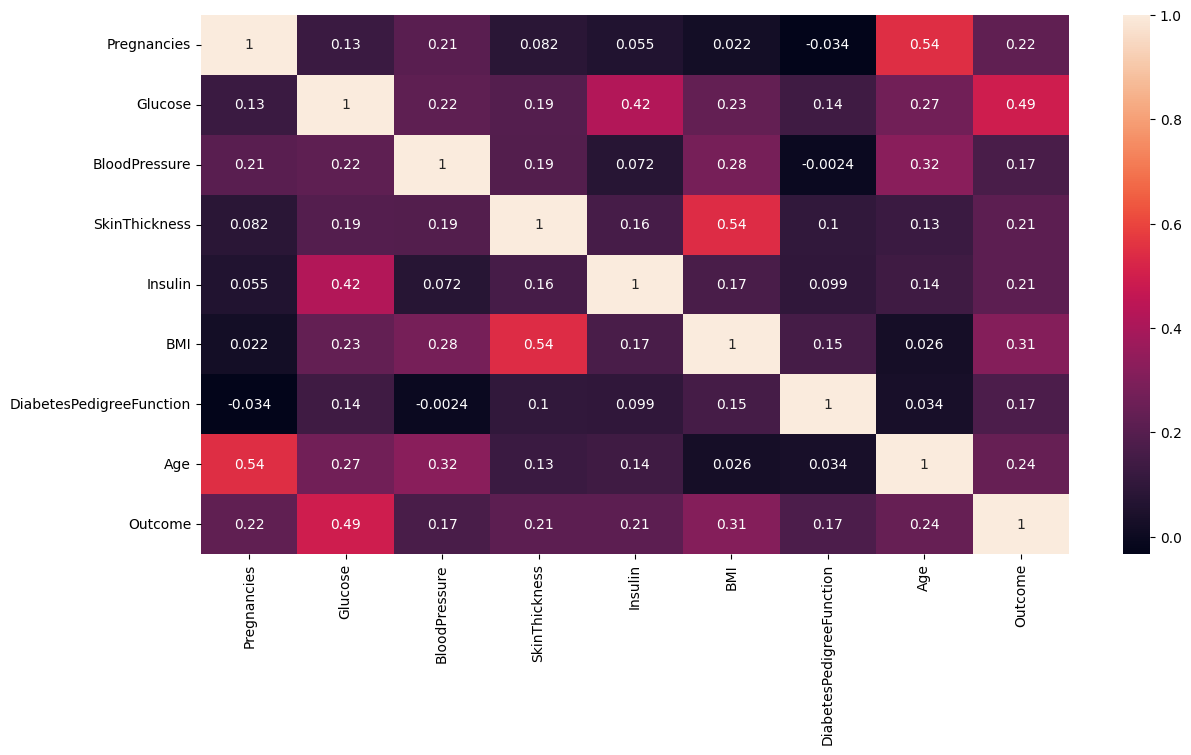

In [17]:
plt.figure(figsize = (14, 7))
sns.heatmap(data.corr(), annot = True)
plt.show()

<Axes: xlabel='Age', ylabel='count'>

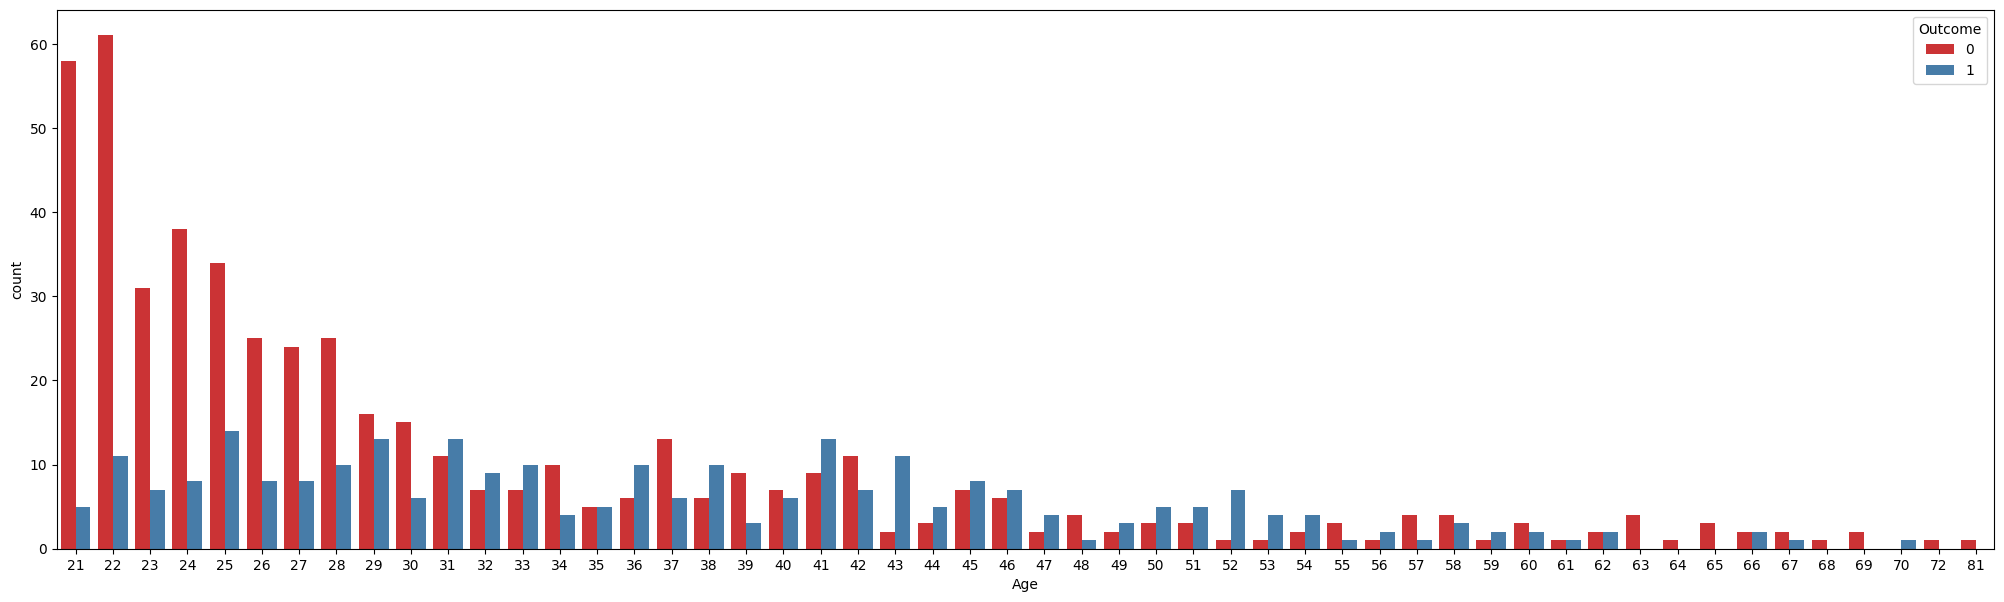

In [18]:
plt.figure(figsize = (25,7))
sns.countplot(x = 'Age', hue = 'Outcome', data = data, palette = 'Set1')

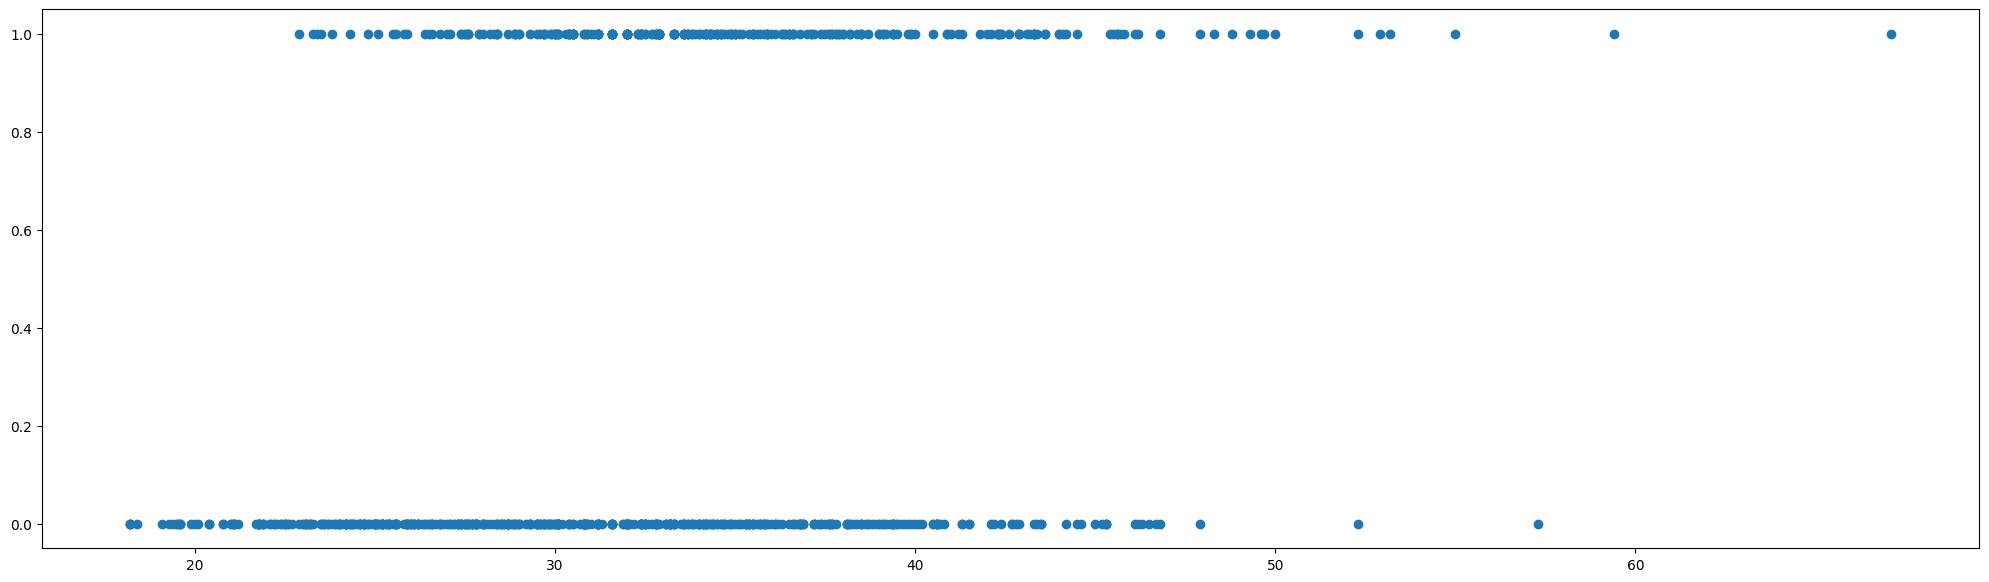

In [19]:
plt.figure(figsize = (25,7))
plt.scatter(data['BMI'], data['Outcome'])

<h2>Splitting data<h2>

In [20]:
#splitting dataset into training and testing set

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 0)

In [21]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150.0,78.0,29.0,126.0,35.2,0.692,54
118,4,97.0,60.0,23.0,155.0,28.2,0.443,22
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23
157,1,109.0,56.0,21.0,135.0,25.2,0.833,23
468,8,120.0,72.0,29.0,155.0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
192,7,159.0,66.0,29.0,155.0,30.4,0.383,36
629,4,94.0,65.0,22.0,155.0,24.7,0.148,21
559,11,85.0,74.0,29.0,155.0,30.1,0.300,35


In [22]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199.0,76.0,43.0,155.0,42.9,1.394,22
122,2,107.0,74.0,30.0,100.0,33.6,0.404,23
113,4,76.0,62.0,29.0,155.0,34.0,0.391,25
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51
529,0,111.0,65.0,29.0,155.0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
476,2,105.0,80.0,45.0,191.0,33.7,0.711,29
482,4,85.0,58.0,22.0,49.0,27.8,0.306,28
230,4,142.0,86.0,29.0,155.0,44.0,0.645,22
527,3,116.0,74.0,15.0,105.0,26.3,0.107,24


<h2>Applying KNN</h2>

In [23]:
#feature Scaling

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
#Loading KNN model

classifier = KNeighborsClassifier(n_neighbors = 11, p = 2, metric = 'euclidean')


In [25]:
#fitting the model

classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [26]:
#making predictions

y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
#Evaluating the model

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(f1_score(y_test, y_pred))

[[94 13]
 [15 32]]
0.6956521739130436


In [28]:
#Display the accuracy

print(accuracy_score(y_test, y_pred))

0.8181818181818182
